In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using CSV
using NoLongerProblems_FileHandling, NoLongerProblems_Pandas, NoLongerProblems
using DataFrames, HypothesisTests, MultipleTesting, Random,Distributions
import Pandas
using PyCall, RCall,PyPlot
using PrettyPlotting,Statistics,Seaborn

include("../Databases/Cuartero2018.jl")
include("../Code/meanmRNAcounts_BSBF.jl")
include("../Code/make_all_genes_file.jl")


"all_genes.csv"

In [2]:
tb = CSV.read("all_genes.csv", DataFrames.DataFrame)

gene = []
RNAseqcomp = []
GROseqcomp = []
smFISHcomp = []
log2FC_RNAseq = []
log2FC_GROseq = []
FC_BS= []
FC_BF = []
N_Cells = []


function addtolists()
    
    push!(gene, gene1)

gro = Cuartero2018.GroseqDeseq(GROseqcomp1); 
g = gro[gro[!,:GeneSymbol] .== gene1, :log2FoldChange]
    if length(g)>0
        push!(log2FC_GROseq, g[1])
    else
        push!(log2FC_GROseq, NaN)
    end
        

push!(GROseqcomp, GROseqcomp1);

rna = Cuartero2018.Cuartero2018Deseq(RNAseqcomp1); r = rna[rna[!,:GeneSymbol] .== gene1, :log2FoldChange][1]; 
push!(RNAseqcomp, RNAseqcomp1); push!(log2FC_RNAseq, r);


smFISHsamples = split(smFISHcomp1);push!(smFISHcomp, smFISHcomp1)
smfish = tb[[in(ii, smFISHsamples) for ii in tb[!,:Sample]], :]
smfish = smfish[smfish[!,:Gene] .== gene1, :]
n1 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[1], :N_Cells])
n2 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[end], :N_Cells])
push!(N_Cells,n1 + n2)   
bf1 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[1], :BF])
bf2 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[end], :BF])
oddsratio = bf1/bf2
 push!(FC_BF, oddsratio)

bs1 = smfish[smfish[!,:Sample] .== smFISHsamples[1], :Mean_TSS]
bs2 = smfish[smfish[!,:Sample] .== smFISHsamples[end], :Mean_TSS]
fc = Statistics.mean(bs1[.!isnan.(bs1)]) ./ Statistics.mean(bs2[.!isnan.(bs2)])
push!(FC_BS, fc)
end


gene1 = "Prdm1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_60 vs Rad21KO_0"
addtolists()

gene1 = "Egr2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_60 vs Rad21KO_0"
addtolists()



gene1 = "Ifnb1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_90 vs Rad21KO_0"
addtolists()

gene1 = "Il12b"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()

RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_90 vs Rad21KO_0"
addtolists()

gene1 = "Ifit1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_180 vs WT_0"
addtolists()

RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_180 vs Rad21KO_0"
addtolists()



gene1 = "Cxcl10"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_120 vs Rad21KO_0"
addtolists()


gene1 = "Peli1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_120 vs Rad21KO_0"
addtolists()


gene1 = "Sertad2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()
RNAseqcomp1 = "FL2_Minus_FLUT"
GROseqcomp1 = "KO1__vs__KO0"
smFISHcomp1 = "Rad21KO_120 vs Rad21KO_0"
addtolists()


gene1 = "Fh1"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()

RNAseqcomp1 = "FL8_Minus_FLUT"
GROseqcomp1 = "KO6__vs__KO0"
smFISHcomp1 = "Rad21KO_8 vs Rad21KO_0"
addtolists()

gene1 = "Hprt"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()

RNAseqcomp1 = "FL8_Minus_FLUT"
GROseqcomp1 = "KO6__vs__KO0"
smFISHcomp1 = "Rad21KO_8 vs Rad21KO_0"
addtolists()


tb_sum = DataFrames.DataFrame(
    FC_BS= FC_BS,
    FC_BF= FC_BF,
    log2FC_BS= log2.(FC_BS),
    log2FC_BF= log2.(FC_BF),
GeneSymbol = gene,
RNAseqcomp = RNAseqcomp,
GROseqcomp = GROseqcomp,
smFISHcomp = smFISHcomp,
log2FC_RNAseq = log2FC_RNAseq,
log2FC_GROseq = log2FC_GROseq,
    N_Cells = N_Cells, 
    Genotype = [split(ii, "_")[1] for ii in smFISHcomp]

    
)

CSV.write("../SourceData/SupFig6.csv", tb_sum)

"../SourceData/SupFig6.csv"

In [3]:
function dysplay_correlation(tb, x, y;  hue = "smFISHcomp")
    bool1 = .! isnan.(tb[!,x]); bool2 = .! isnan.(tb[!,y])
     nonantb = tb[bool1.*bool2, :]
    sort!(nonantb, "smFISHcomp")
    x1 = [ii for ii in nonantb[!,x]]
    y1 = [ii for ii in nonantb[!,y]]
    
    nonantb[!,:x] = x1
    nonantb[!,:y] = y1
    
    pdt = Pandas.DataFrame(nonantb)

    
    py"""
    import seaborn as sns
    sns.scatterplot(data = $pdt, x= $x, y = $y, hue = $hue, s = 50, linewidth = 0, hue_order = ["WT", "Rad21KO"], palette = ["black", "red"])
    
    sns.regplot(data = $pdt, x= $x, y = $y, scatter = 0, color = "darkgray")

    """
    pretty_axes2()
    legend_out_of_plot()
    print(R"cor.test($x1,$y1)")
    
    
    
    
    R"""
    
    lm_TSS <- lm(y~ x*Genotype, data = $nonantb)

summary(aov(lm_TSS))
    """
    
    
end

dysplay_correlation (generic function with 1 method)

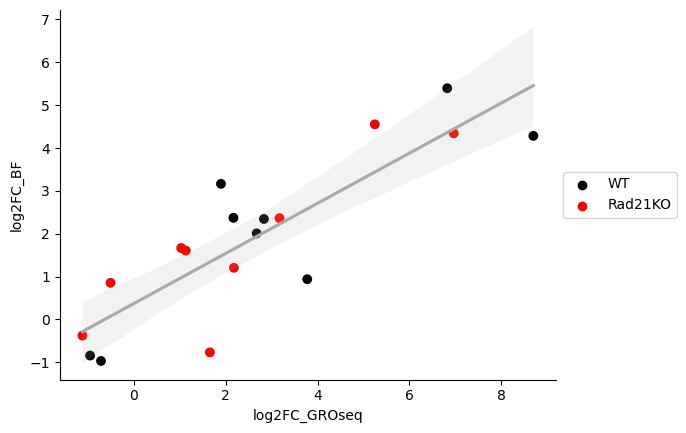

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 6.582, df = 16, p-value = 6.31e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6450615 0.9445784
sample estimates:
      cor 
0.8545695 



RObject{VecSxp}
            Df Sum Sq Mean Sq F value   Pr(>F)    
x            1  46.58   46.58  38.104 2.42e-05 ***
Genotype     1   0.07    0.07   0.057    0.815    
x:Genotype   1   0.02    0.02   0.016    0.901    
Residuals   14  17.11    1.22                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [4]:
dysplay_correlation(tb_sum, "log2FC_GROseq", "log2FC_BF", hue = "Genotype")

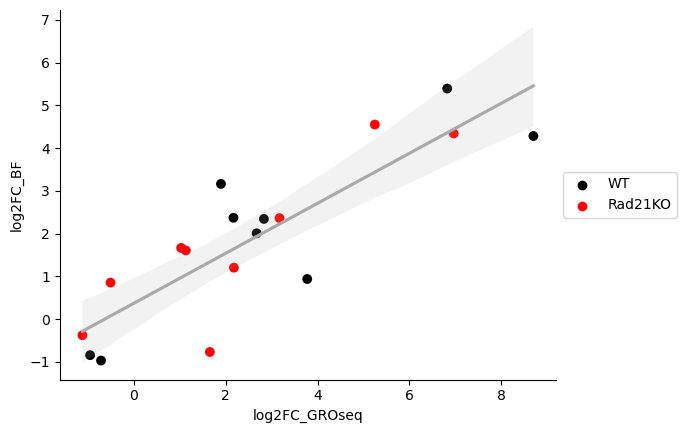

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 6.582, df = 16, p-value = 6.31e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6450615 0.9445784
sample estimates:
      cor 
0.8545695 



RObject{VecSxp}
            Df Sum Sq Mean Sq F value   Pr(>F)    
x            1  46.58   46.58  38.104 2.42e-05 ***
Genotype     1   0.07    0.07   0.057    0.815    
x:Genotype   1   0.02    0.02   0.016    0.901    
Residuals   14  17.11    1.22                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [5]:
dysplay_correlation(tb_sum, "log2FC_GROseq", "log2FC_BF", hue = "Genotype")

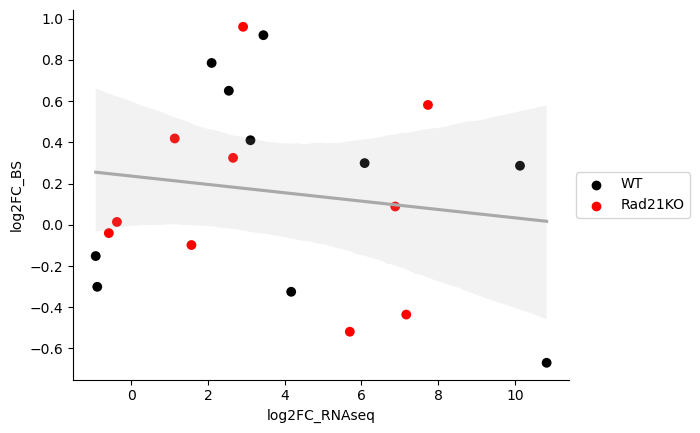

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = -0.63506, df = 18, p-value = 0.5334
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5542491  0.3151277
sample estimates:
       cor 
-0.1480369 



RObject{VecSxp}
            Df Sum Sq Mean Sq F value Pr(>F)
x            1  0.096 0.09641   0.361  0.556
Genotype     1  0.027 0.02655   0.099  0.757
x:Genotype   1  0.003 0.00324   0.012  0.914
Residuals   16  4.273 0.26706               


In [6]:
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS", hue = "Genotype")

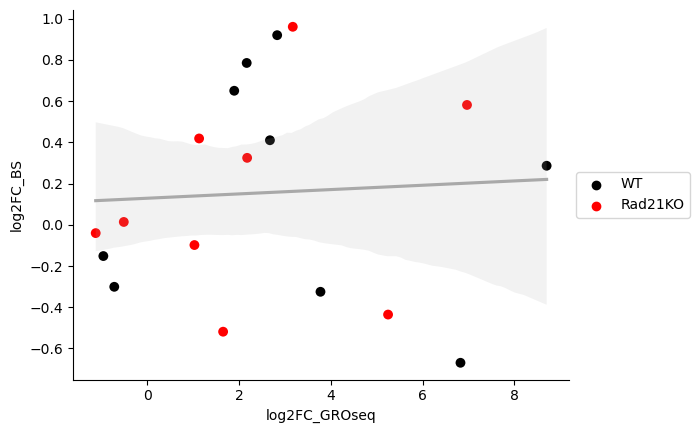

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 0.23498, df = 16, p-value = 0.8172
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4197181  0.5115090
sample estimates:
       cor 
0.05864343 



RObject{VecSxp}
            Df Sum Sq Mean Sq F value Pr(>F)
x            1  0.015 0.01504   0.050  0.827
Genotype     1  0.006 0.00582   0.019  0.892
x:Genotype   1  0.113 0.11338   0.374  0.550
Residuals   14  4.240 0.30287               


In [7]:
dysplay_correlation(tb_sum, "log2FC_GROseq", "log2FC_BS", hue = "Genotype")

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 6.582, df = 16, p-value = 6.31e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6450615 0.9445784
sample estimates:
      cor 
0.8545695 

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 0.23498, df = 16, p-value = 0.8172
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4197181  0.5115090
sample estimates:
       cor 
0.05864343 

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 5.5873, df = 18, p-value = 2.653e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5464987 0.9160818
sample estimates:
      cor 
0.7964165 



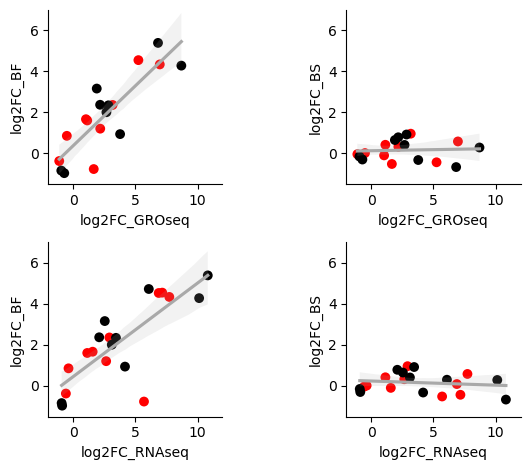

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = -0.63506, df = 18, p-value = 0.5334
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5542491  0.3151277
sample estimates:
       cor 
-0.1480369 



In [8]:
subplot(2,2,1)
dysplay_correlation(tb_sum, "log2FC_GROseq", "log2FC_BF", hue = "Genotype")
ylim(-1.5, 7)
xlim(-2, 12)
   ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")
legend_removal()

subplot(2,2,2)
dysplay_correlation(tb_sum, "log2FC_GROseq", "log2FC_BS", hue = "Genotype")
ylim(-1.5, 7)
xlim(-2, 12)
   ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")
legend_removal()

subplot(2,2,3)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF", hue = "Genotype")

ylim(-1.5, 7)
xlim(-2, 12)

    ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")
legend_removal()

subplot(2,2,4)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS", hue = "Genotype")

ylim(-1.5, 7)
xlim(-2, 12)

    ax = gca()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable="box")

legend_removal()

plt.tight_layout()

py"""
import matplotlib as mpl

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
import matplotlib.pyplot as plt
plt.savefig("smFISHvsRNAchanges_WTRad21KO.svg")
"""

In [9]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
